# Introduction




# Prepare for analysis

## Load packages

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# TODO: Add all hard coded parameters like file paths or model parameters here
import sys
from pathlib import Path

NOTEBOOK_DIR = Path().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parent
sys.path.append(str(PROJECT_ROOT))

from src.data import load_data, missing_summary, nonnull_unique_summary, most_frequent_summary, concat_with_set, inspect_dataframes
from src.features import add_family_size, add_age_interval, add_fare_interval, add_sex_pclass, add_parsed_name_columns, copy_titles, unify_titles, add_family_type, encode_sex_numeric
from src.model import make_split, get_xy, fit_predict_rf
from src.utils import countplot_with_hue, groupby_mean, plot_distribution_pairs, plot_categorical_pairs





## Read the data

In [3]:
# TODO: Put the path at the top of the script and replace with variable
train_df, test_df = load_data()

# Preliminary data inspection

## Quick glimpse of the data
TODO: Think if you can abstract away much here.

In [4]:
inspect_dataframes(train_df, test_df)


===== TRAIN SET =====


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


===== TEST SET =====


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Shape: (418, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


None

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
train_df.describe()

In [ ]:
test_df.describe()

## Few statistics on the data

### Missing data

In [5]:
# TODO: turn into function
df_missing_train = missing_summary(train_df)

In [6]:
# TODO: turn into function
df_missing_test = missing_summary(test_df)

### Most frequent data

In [7]:
# TODO: turn into function
df_most_freq_train = most_frequent_summary(train_df)

In [8]:
# TODO: turn into function
df_most_freq_test = most_frequent_summary(test_df)

### Unique values

In [9]:
# TODO: turn into function
nonnull_unique_summary(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [10]:
# TODO: turn into function
nonnull_unique_summary(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Uniques,418,3,418,2,79,7,8,363,169,76,3


# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [11]:
# TODO: turn into function
all_df = concat_with_set(train_df, test_df)

In [12]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


C:\Users\Bronny\AppData\Local\Temp\ipykernel_39636\645490038.py:4: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x="Sex", data=all_df, hue="set", palette= color_list)


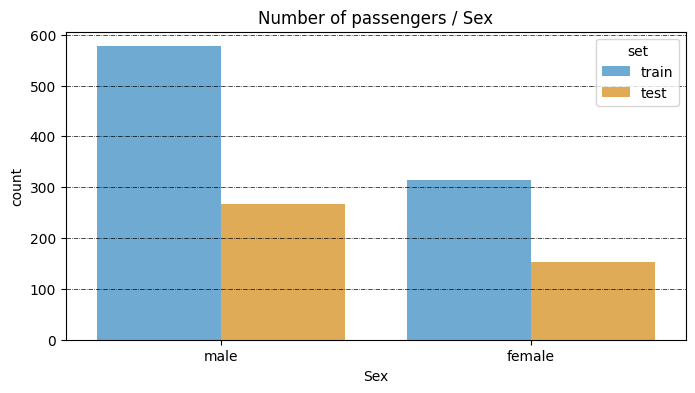

In [13]:
# Plot count pairs "Sex"
color_list = ["#5DADE2", "#F5B041", "#58D68D", "#AF7AC5"]
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Sex", data=all_df, hue="set", palette= color_list)
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Number of passengers / Sex")
plt.show()  

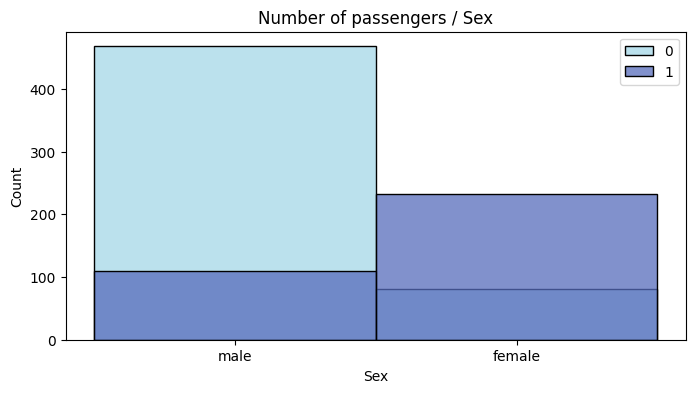

In [14]:
# Plot distribution pairs for "Sex" and hue as "Survived"
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
f, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, h in enumerate(train_df["Survived"].unique()):
    g = sns.histplot(train_df.loc[train_df["Survived"]==h, "Sex"], 
                                  color=color_list[i], 
                                  ax=ax, 
                                  label=h)
ax.set_title("Number of passengers / Sex")
g.legend()
plt.show()

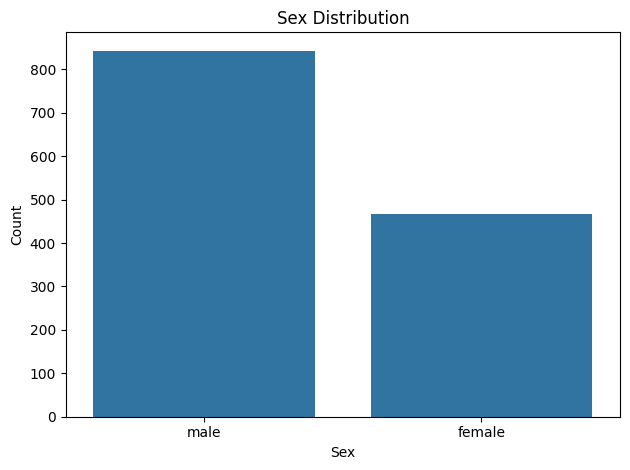

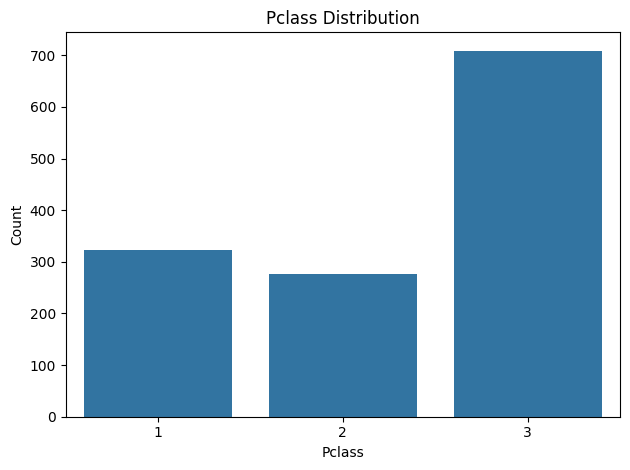

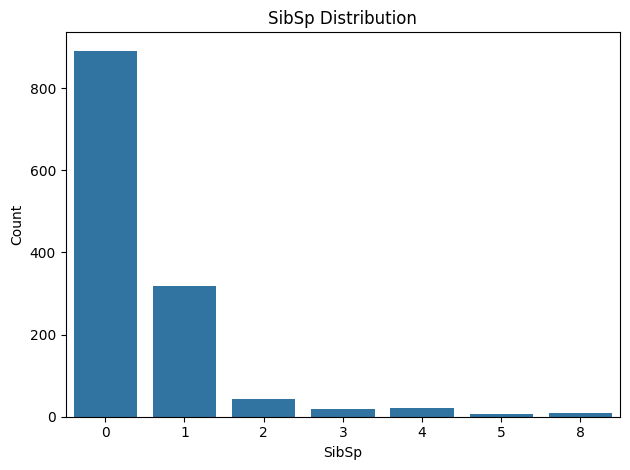

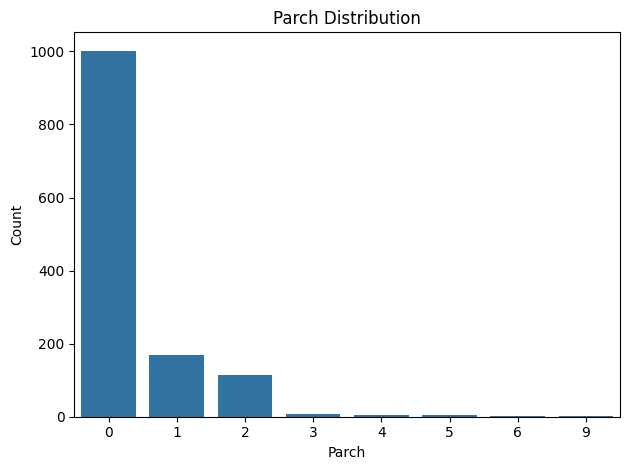

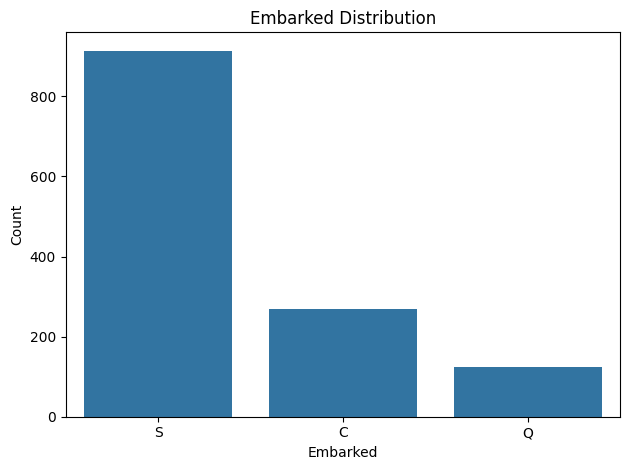

In [15]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked
categorical_cols = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
plot_categorical_pairs(all_df, categorical_cols)

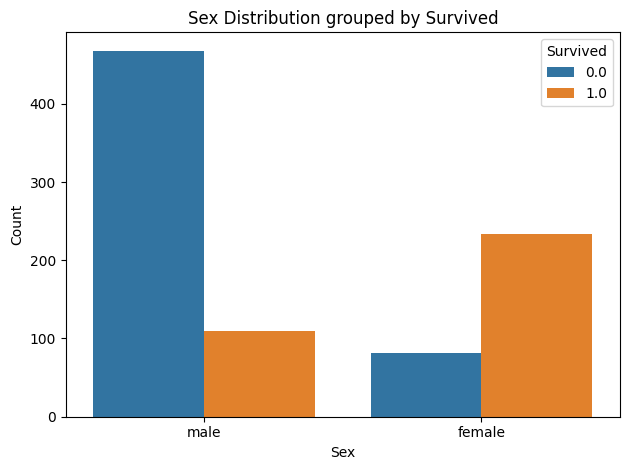

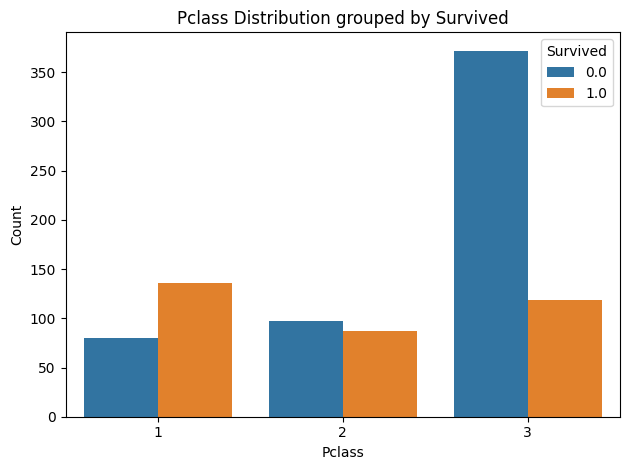

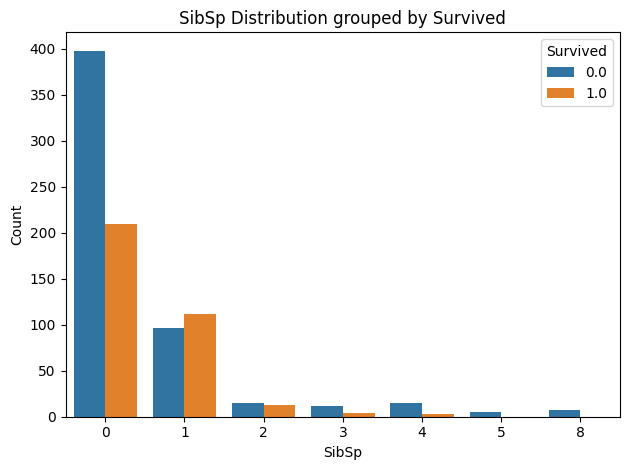

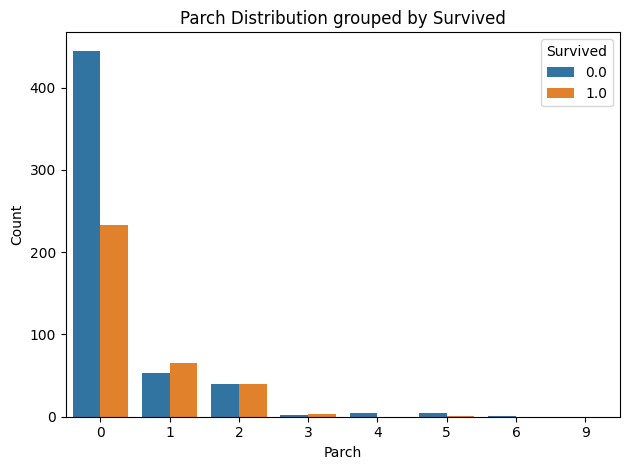

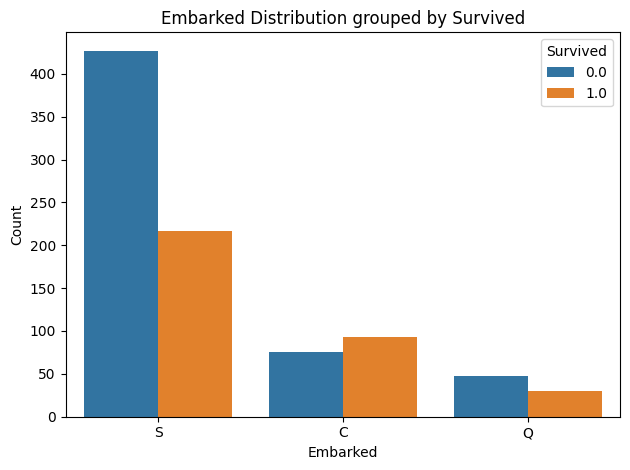

In [16]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked and use "Survived" as hue.
plot_categorical_pairs(all_df, categorical_cols, hue="Survived")

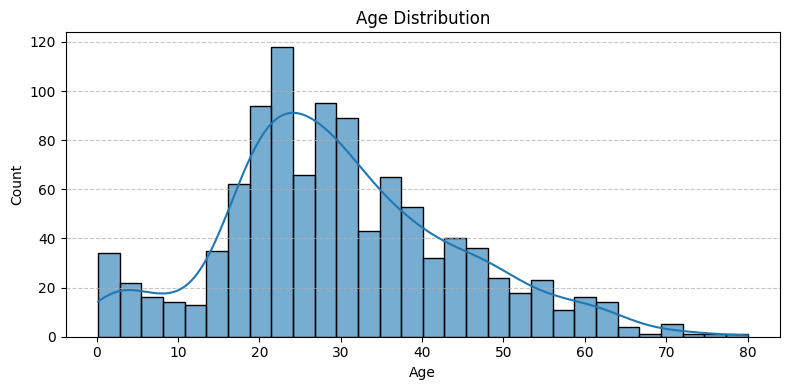

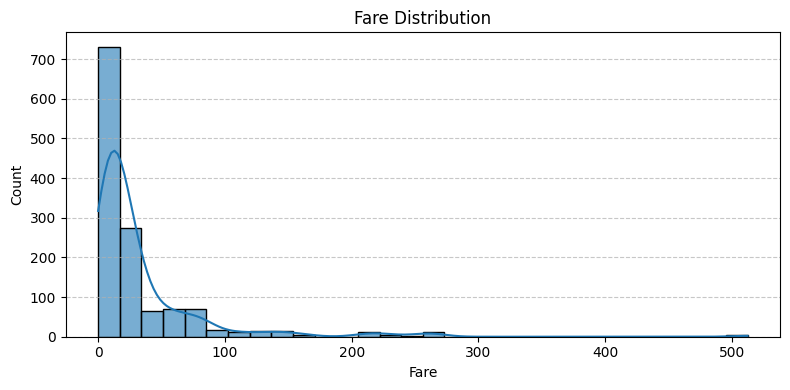

In [17]:
# Plot distribution pairs for Age and Fare
plot_distribution_pairs(all_df, cols=["Age", "Fare"])

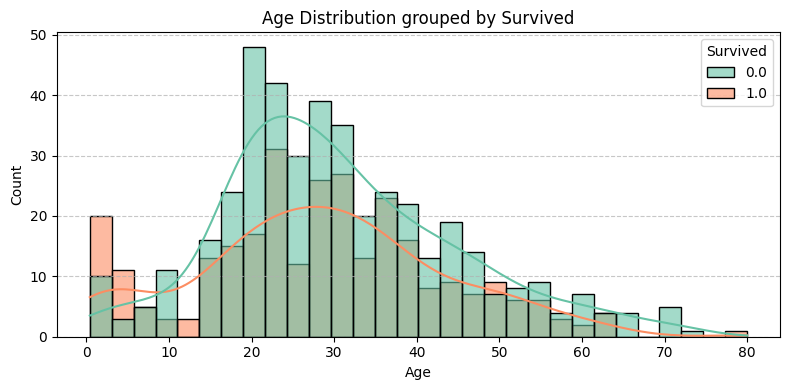

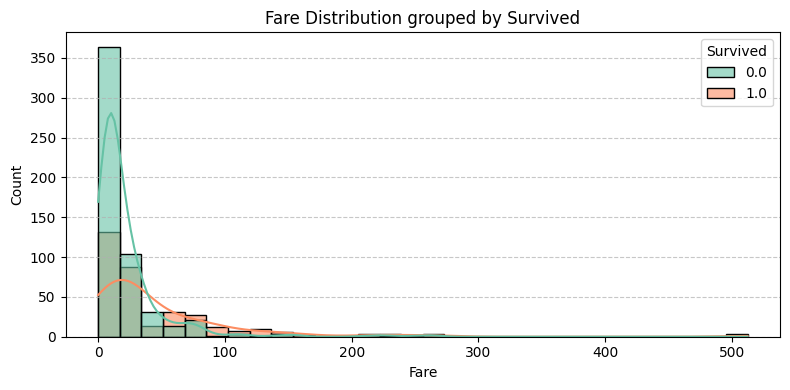

In [18]:
# Plot distribution pairs for Age and Fare using "Survived" as hue
plot_distribution_pairs(all_df, cols=["Age", "Fare"], hue="Survived")

## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [19]:
# TODO: turn into function
all_df = add_family_size(all_df)

In [20]:
# TODO: turn into function
train_df = add_family_size(train_df)

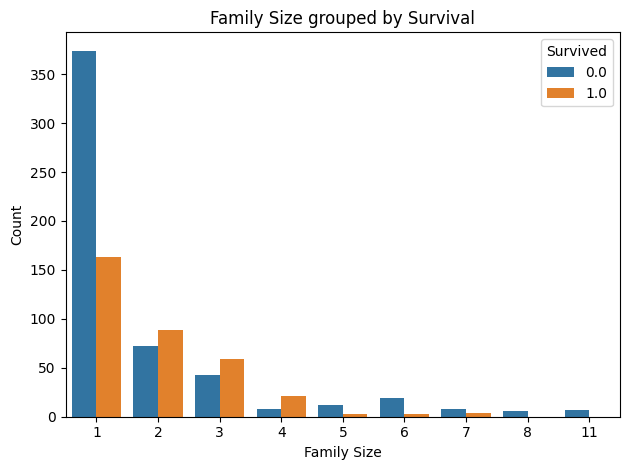

In [21]:
# Plot count pairs using all_df for the column "Family Size" and use "Survived" as hue.
countplot_with_hue(
    df=all_df,
    x="Family Size",
    hue="Survived",
    title="Family Size grouped by Survival"
)
plt.show()


## Age interval

In [22]:
# TODO: turn into function
all_df = add_age_interval(all_df)

In [23]:
# TODO: turn into function
train_df = add_age_interval(train_df)

In [24]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set,Family Size,Age Interval
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,2,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,2,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,1,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,2,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,1,2.0


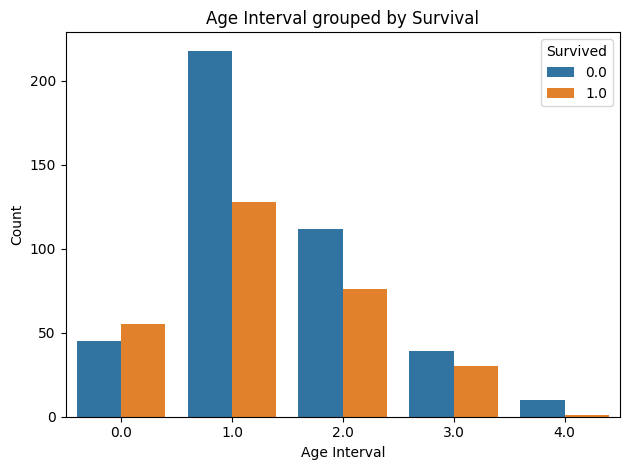

In [25]:
# Plot count pairs using all_df for the column "Age Interval" and use "Survived" as hue.
countplot_with_hue(
    df=all_df,
    x="Age Interval",
    hue="Survived",
    title="Age Interval grouped by Survival"
)
plt.show()

## Fare interval

In [26]:
# TODO: turn into function
all_df = add_fare_interval(all_df)

In [27]:
# TODO: turn into function
train_df = add_fare_interval(train_df)

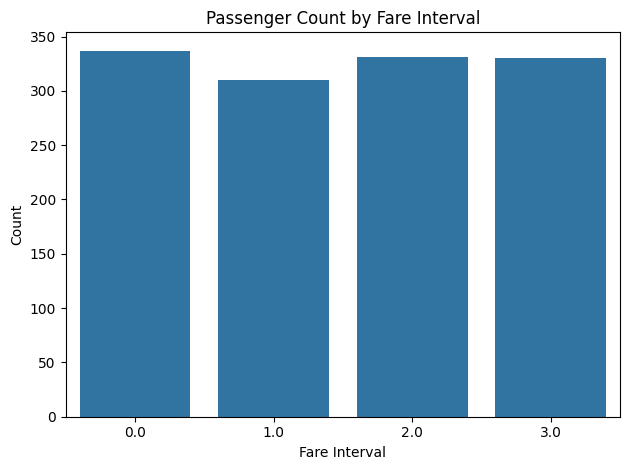

In [28]:
# Plot count pairs using all_df for the column "Fare Interval"
countplot_with_hue(
    df=all_df,
    x="Fare Interval",
    hue=None,
    title="Passenger Count by Fare Interval"
)
plt.show()

Let's create a composed feature: Pclass + Sex.

In [29]:
# TODO: turn into function
train_df = add_sex_pclass(train_df)

In [30]:
# TODO: turn into function
all_df = add_sex_pclass(all_df)

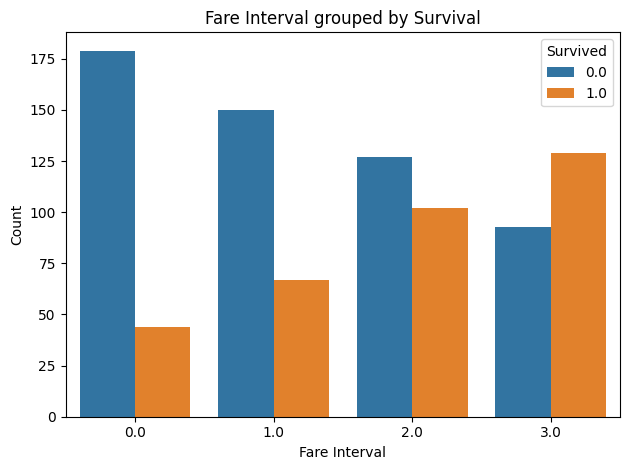

In [31]:
# Plot count pairs using all_df for the column "Fare Interval" and "Fare (grouped by survival)" with "Survived" as hue
countplot_with_hue(
    df=all_df,
    x="Fare Interval",
    hue="Survived",
    title="Fare Interval grouped by Survival"
)
plt.show()


## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [32]:
# TODO: also move this function to a separate file
def parse_names(row):
    try:
        text = row["Name"]
        split_text = text.split(",")
        family_name = split_text[0]
        next_text = split_text[1]
        split_text = next_text.split(".")
        title = (split_text[0] + ".").lstrip().rstrip()
        next_text = split_text[1]
        if "(" in next_text:
            split_text = next_text.split("(")
            given_name = split_text[0]
            maiden_name = split_text[1].rstrip(")")
            return pd.Series([family_name, title, given_name, maiden_name])
        else:
            given_name = next_text
            return pd.Series([family_name, title, given_name, None])
    except Exception as ex:
        print(f"Exception: {ex}")
    
    

In [33]:
# TODO: turn into function
all_df = add_parsed_name_columns(all_df)

In [34]:
# TODO: turn into function
train_df = add_parsed_name_columns(train_df)

## Multivariate analysis


Let's look now to the interaction of multiple features.

<Axes: xlabel='Age Interval', ylabel='Count'>

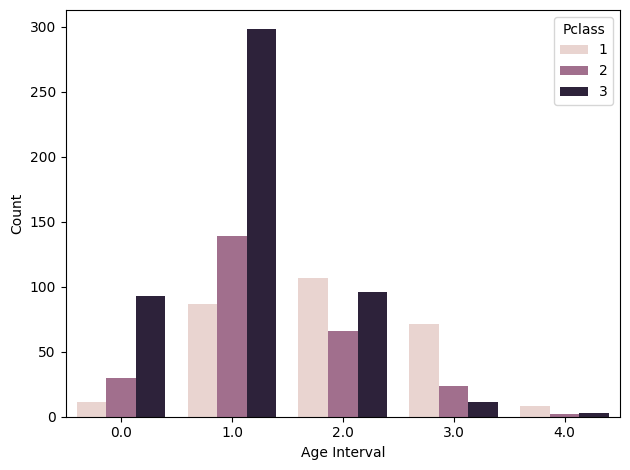

In [35]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"
countplot_with_hue(all_df, x="Age Interval", hue="Pclass")

<Axes: xlabel='Age Interval', ylabel='Count'>

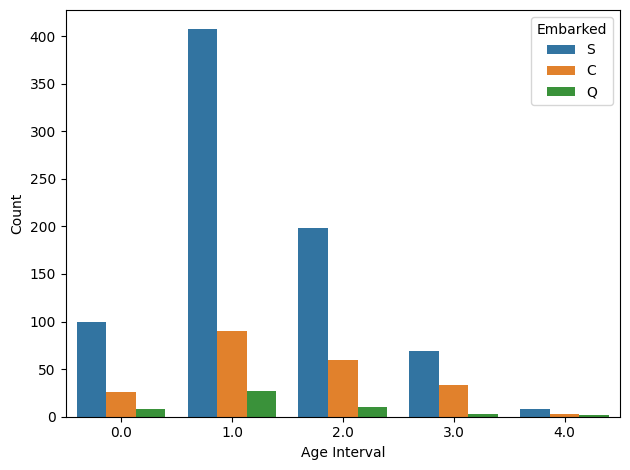

In [36]:
# TODO: Plot count pairs of "Age Interval" grouped by "Embarked"
countplot_with_hue(all_df, x="Age Interval", hue="Embarked")

<Axes: xlabel='Pclass', ylabel='Count'>

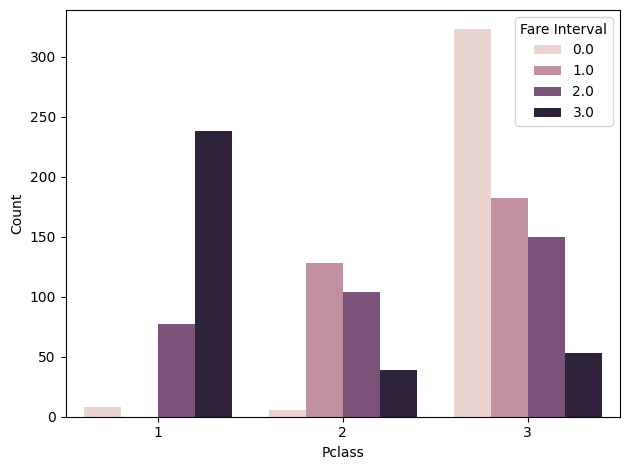

In [37]:
# TODO: Plot count pairs of "Pclass" grouped by "Fare Interval"
countplot_with_hue(all_df, x="Pclass", hue="Fare Interval")

### Few more engineered data 


Let's create two more engineered features:  
* Family size interval: Single, Small, Large  
* Aggregated titles: Mr, Mrs, Master, Miss, and Rare  

In [38]:
# TODO: turn into function
all_df = add_family_type(all_df)

C:\Users\Bronny\ps1_ex4_nb_to_repo\src\features.py:99: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  out.loc[out['Family Size'] == 1, 'Family Type'] = 'Single'


In [39]:
# TODO: turn into function
train_df = add_family_type(train_df)

C:\Users\Bronny\ps1_ex4_nb_to_repo\src\features.py:99: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  out.loc[out['Family Size'] == 1, 'Family Type'] = 'Single'


In [40]:
for dataset in [all_df, train_df]:
    dataset["Titles"] = dataset["Title"]

In [41]:
# TODO: turn into function
all_df = unify_titles(all_df)
train_df = unify_titles(train_df)

In [42]:
# TODO: turn into function
train_df[['Titles', 'Sex', 'Survived']].groupby(['Titles', 'Sex'], as_index=False).mean()

,Titles,Sex,Survived
0,Master.,male,0.575000
1,Miss.,female,0.702703
2,Mr.,male,0.156673
3,Mrs.,female,0.793651
4,Rare,female,1.000000
5,Rare,male,0.250000


# Baseline model

## Feature engineering: Map categorical value to numerical values

In [43]:
# TODO: turn into function
train_df = encode_sex_numeric(train_df)
test_df = encode_sex_numeric(test_df)

Create train-validation split.

In [44]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

Define predictor features and target feature.

In [45]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [46]:
# TODO: turn into function
train_X, train_Y, valid_X, valid_Y = get_xy(train, valid, predictors, target)

Initialize the classifiction algorithm.

In [ ]:
# TODO: could this and the following code cells be turned into a function that returns the prediction?
# Model 1
clf = RandomForestClassifier(
    n_jobs=-1,
    random_state=42,
    criterion="gini",
    n_estimators=100,
    verbose=False
)

# Model 2
model, preds, metrics_dict = fit_predict_rf(
    train, valid, predictors, target,
    n_estimators=100, random_state=42, n_jobs=-1, criterion="gini"
)

train_X, train_Y, valid_X, valid_Y = get_xy(train, valid, predictors, target)
preds_tr = model.predict(train_X)

print("Classification report:")
print(pd.DataFrame(metrics_dict['classification_report']).T)
print("\nAUC:", metrics_dict['auc'])

Classification report:
              precision    recall  f1-score     support
Not Survived   0.726619  0.961905  0.827869  105.000000
Survived       0.900000  0.486486  0.631579   74.000000
accuracy       0.765363  0.765363  0.765363    0.765363
macro avg      0.813309  0.724196  0.729724  179.000000
weighted avg   0.798296  0.765363  0.746721  179.000000

AUC: 0.8417631917631918


Fit the classifier with the training data.

In [53]:
clf.fit(train_X, train_Y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Predict the train data (to check the training classification error).

In [54]:
preds_tr = clf.predict(train_X)

Predict the validation data.

In [55]:
preds = clf.predict(valid_X)

# Evaluation

## Classification report for training data.

In [56]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.75      0.99      0.86       444
    Survived       0.96      0.47      0.63       268

    accuracy                           0.79       712
   macro avg       0.86      0.73      0.74       712
weighted avg       0.83      0.79      0.77       712



Classification report for validation data.

In [57]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.73      0.96      0.83       105
    Survived       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179

